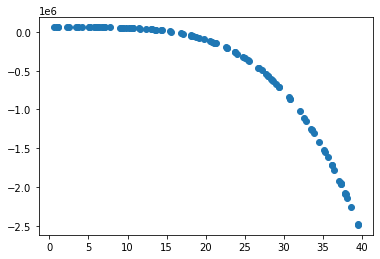

yes:  []
Linear, polynomial or multilinear?
2
b0:  61005.0175186416
[[ 5.60979891]
 [-0.03122505]
 [ 2.09680064]
 [-1.09995212]]
Prediction:  [49264.169646544935]


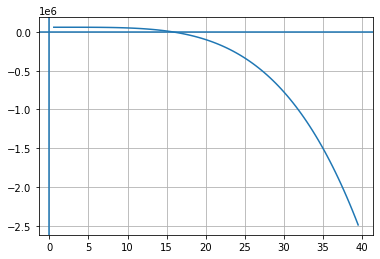

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

import math
def round_down(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n * multiplier) / multiplier
def multiply_matrix(A,B):

    C = np.array([[sum(a*b for a,b in zip(A_row, B_col)) for B_col in zip(*B)] 
    for A_row in A])
    return C

def list_duplicates(seq):
    seen = set()
    seen_add = seen.add
    seen_twice = set( x for x in seq if x in seen or seen_add(x) )
    return list( seen_twice )

def plot_linear_function():
    xArray = []
    yArray = []
    
    xArray1 = []
    xArray2 = []
    xArray3 = []
    xArray4 = []
    val = 0
    if val == 0:
        with open("Podatki_polinom.txt") as f:
            next(f)
            for eachLine in f:
                xArray.append((float(format(eachLine.strip().split()[-2].strip()))))
                yArray.append((float(format(eachLine.strip().split()[-1].strip()))))
                
        matrix = np.column_stack((xArray,yArray))
        matrix = matrix[matrix[:, 1].argsort()]
        plt.scatter(matrix[:, 0],matrix[:, 1])

        plt.show()
        print("yes: ", list_duplicates(yArray))
        return [xArray,yArray]

    else:
        
        with open("Podatki_multilinearna.txt") as f:
            next(f)
            for eachLine in f:
                xArray4.append((float(format(eachLine.strip().split()[-2].strip()))))
                xArray3.append((float(format(eachLine.strip().split()[-3].strip()))))
                xArray2.append((float(format(eachLine.strip().split()[-4].strip()))))
                xArray1.append((float(format(eachLine.strip().split()[-5].strip()))))
                yArray.append((float(format(eachLine.strip().split()[-1].strip()))))
        xmatrix = np.column_stack((xArray1,xArray2,xArray3,xArray4))
        ax = plt.axes(projection='3d')

        fig = plt.figure()
        ax.scatter3D(xArray4, xArray3, yArray);
        plt.show()

        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter3D(xArray2, xArray1, yArray);
        plt.show()
        return xmatrix,yArray

    

def linear_regression(x, y, matrix):
    
    print("Linear, polynomial or multilinear?")
    inpu = input()
    val = int(inpu)
    
    if val == 1:
        x_average = sum(x) / len(x)
        y_average = sum(y) / len(y)

        X_matrix = np.array(x).reshape(len(x),1) - x_average
        Y_matrix = np.array(y).reshape(len(y),1) - y_average

        xt = list(zip(*X_matrix))
        XTdotX = multiply_matrix(xt, X_matrix)
        XTdotXInverse = np.linalg.inv(XTdotX)
        XTdotInverseTranspose = multiply_matrix(XTdotXInverse, xt)
        XYdot =  multiply_matrix(XTdotInverseTranspose, Y_matrix)
        
        b0 = y_average - (XYdot * x_average)
        print(round(b0[0][0],1))
        print(XYdot)

        x = np.linspace(min(x), max(x), len(x))
        y = round(b0[0][0],1) + x*round(XYdot[0][0],1)
        prediction_x = 1200
        prediction_y = round(b0[0][0],1) + prediction_x*round(XYdot[0][0],1)
        print("Prediction:", prediction_y)
        fig, ax = plt.subplots()
        ax.plot(x, y)
        ax.set_xlim(min(x), max(x))
        ax.set_ylim(min(y), max(y))
        plt.show()
    elif val == 2:
        order = 4
        
        x_average = sum(x) / len(x)
        y_average = sum(y) / len(y)
        x_averages = []
        X_matrix = np.zeros((len(x), order))
        Y_matrix = np.array(y).reshape(len(y),1) - y_average
     
        ##Preobdelava podatkov
        for i in range (0, len(x)):
            for j in range (0, order):
                X_matrix[i][j] = pow(x[i],j+1)

        sum_columns = [sum(col) for col in zip(*X_matrix)]
        for k in sum_columns:
            x_averages.append(k/len(x))

        for i in range (0, len(x)):
            for j in range (0, order):
                X_matrix[i][j] = X_matrix[i][j] - x_averages[j]

        ##Linearna regresija
        xt = list(zip(*X_matrix))
        XTdotX = multiply_matrix(xt, X_matrix)
        XTdotXInverse = np.linalg.inv(XTdotX)
        XTdotInverseTranspose = multiply_matrix(XTdotXInverse, xt)
        XYdot =  multiply_matrix(XTdotInverseTranspose, Y_matrix)
        
        b0 = y_average
        averages_sum = 0
        for b in range(0, order):
            averages_sum = averages_sum + (XYdot[b][0] * x_averages[b])

        b0 = y_average - averages_sum
        print("b0: ",b0)
        print(XYdot)
        x1 = np.linspace(min(x), max(x), len(x))
        fx = []
        summation = 0
        prediction_x = [10.6888]
        prediction_y = []
        for k in range(len(prediction_x)):
            summation = 0
            for j in range(order):
                summation = summation + (XYdot[j][0] * pow(prediction_x[k], j + 1))
            prediction_y.append(b0 + summation)
        print("Prediction: ", prediction_y)
        ##Računanje polinoma
        for k in range(len(x1)):
            summation = 0
            for j in range(order):
                summation = summation + (XYdot[j][0] * pow(x1[k], j + 1))
            fx.append(b0 + summation)
        ###Graf
        plt.plot(x1,fx)
        plt.grid()
        plt.axvline()
        plt.axhline()
        plt.show()
    else:
        ind_var = 4
        x_averages = []
        y_average = sum(y) / len(y)
        X_matrix = xmatrix
        Y_matrix = np.array(y).reshape(len(y),1) - y_average
        averages_sum = 0

        sum_columns = [sum(col) for col in zip(*X_matrix)]
        for k in sum_columns:
            x_averages.append(k/len(x))
        
        
        for i in range (0, len(x)):
            for j in range (0, ind_var):
                X_matrix[i][j] = X_matrix[i][j] - x_averages[j]
        
        xt = list(zip(*X_matrix))
        XTdotX = multiply_matrix(xt, X_matrix)
        XTdotXInverse = np.linalg.inv(XTdotX)
        XTdotInverseTranspose = multiply_matrix(XTdotXInverse, xt)
        XYdot =  multiply_matrix(XTdotInverseTranspose, Y_matrix)


        for b in range(0, ind_var):
            averages_sum = averages_sum + ((XYdot[b][0]) * x_averages[b])
        
        b0 = y_average - averages_sum
        summation = b0
        prediction_x = [391.675, 776.33, 263.619, 891.171]
        prediction_y = []
        for k in range(len(prediction_x)):
            summation = summation + (XYdot[k][0] * prediction_x[k])
        prediction_y.append(summation)
        print("Prediction: ", prediction_y)
        print(b0)
        print(XYdot)

xmatrix,yarray = plot_linear_function()
linear_regression(xmatrix,yarray,0)
